In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.optim import Optimizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np

In [2]:
torch.manual_seed(42)

In [3]:
train_df = pd.read_csv("D:\\Work\wsl\\ML-DS\\fashion-mnist\\fashion-mnist_train.csv").head(5000)
test_df = pd.read_csv("D:\\Work\wsl\\ML-DS\\fashion-mnist\\fashion-mnist_test.csv").head(1000)

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Converting to Numpy
X_train = train_df.iloc[:,1:].values
y_train = train_df.iloc[:,0].values

X_test = test_df.iloc[:,1:].values
y_test = test_df.iloc[:,0].values

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training set
X_test_scaled = scaler.transform(X_test) 

In [8]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 46,  0,  0]])

In [9]:
y_train

array([2, 9, 6, ..., 6, 3, 6])

In [10]:
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [11]:
train_dataset = CustomDataset(X_train_scaled, y_train)
test_dataset = CustomDataset(X_test_scaled, y_test)

In [12]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
num_cls = len(np.unique(y_train))

Batch 1:
  Images shape: torch.Size([32, 784])
  Labels shape: torch.Size([32])
  Labels: tensor([5, 0, 9, 2, 6, 0, 0, 7, 5, 3])


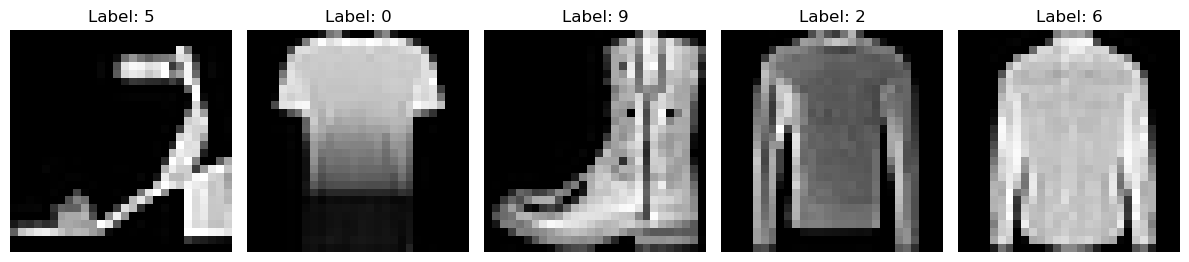

In [13]:
# Test the DataLoader
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"  Images shape: {images.shape}")
    print(f"  Labels shape: {labels.shape}")
    print(f"  Labels: {labels[:10]}")
    
    # Visualize first few images from the batch
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i in range(5):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
    
    break  # Only show first batch

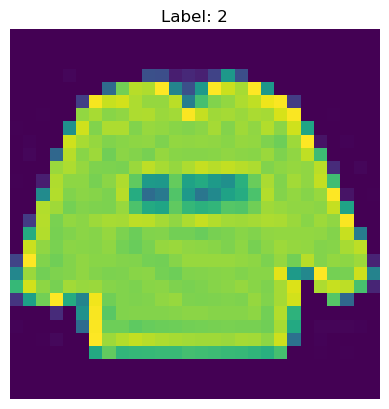

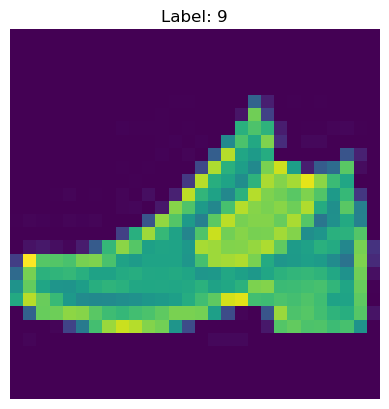

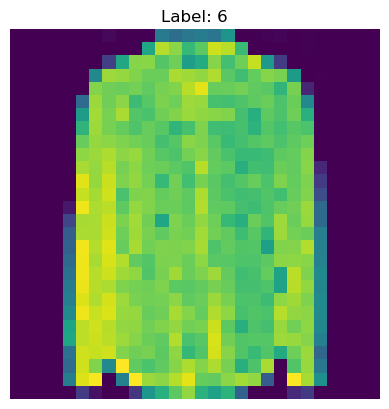

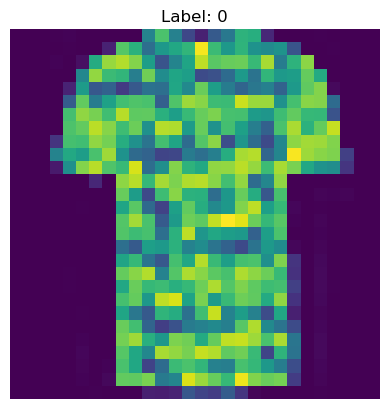

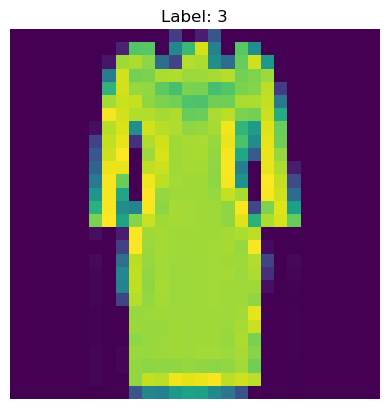

In [14]:
# Show the first 5 images in test_df
for i in range(5):
    img = train_df.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img)#, cmap='gray')
    plt.title(f"Label: {train_df.iloc[i, 0]}")
    plt.axis('off')
    plt.show()

In [15]:
class MyANN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.num_features = num_features
        print(num_features)
        self.model = nn.Sequential(nn.Linear(num_features, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, 64),
                                   nn.ReLU(),   
                                   nn.Linear(64, num_cls)
                                   )
    def forward(self, x) :
        return self.model(x)

In [16]:
model = MyANN(num_features=X_train.shape[1])

784


In [17]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(params=model.parameters(), lr=learning_rate) 
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [18]:
epochs = 100

for epoch in range(epochs):

    total_epoch_loss = 0

    for batch_features, batch_lables in train_loader:
   
        outputs= model(batch_features)

        loss = criterion(outputs, batch_lables)
        
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    
    avg_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 2.307619182926834
Epoch: 2 , Loss: 2.2918253704241125
Epoch: 3 , Loss: 2.2755599006725724
Epoch: 4 , Loss: 2.2576726029632956
Epoch: 5 , Loss: 2.238902605263291
Epoch: 6 , Loss: 2.2189710793221833
Epoch: 7 , Loss: 2.198008311022619
Epoch: 8 , Loss: 2.17489527896711
Epoch: 9 , Loss: 2.1489730093889174
Epoch: 10 , Loss: 2.1205789830274644
Epoch: 11 , Loss: 2.0882069563410086
Epoch: 12 , Loss: 2.0526205551852086
Epoch: 13 , Loss: 2.0136957107835514
Epoch: 14 , Loss: 1.970265344449669
Epoch: 15 , Loss: 1.9221810261914685
Epoch: 16 , Loss: 1.8730422964521274
Epoch: 17 , Loss: 1.818833406563777
Epoch: 18 , Loss: 1.7641583825372587
Epoch: 19 , Loss: 1.7077621570817985
Epoch: 20 , Loss: 1.652834293948617
Epoch: 21 , Loss: 1.60043526986602
Epoch: 22 , Loss: 1.5478658296500043
Epoch: 23 , Loss: 1.4994011274568595
Epoch: 24 , Loss: 1.452515487458296
Epoch: 25 , Loss: 1.4093369313865711
Epoch: 26 , Loss: 1.368293538215054
Epoch: 27 , Loss: 1.3287656474265324
Epoch: 28 , Loss: 1.29

In [21]:
model.eval()
total = 0
correct = 0

for batch_features, batch_lables in test_loader:
    outputs = model(batch_features)
    _, pred = torch.max(outputs, 1)
    total += batch_lables.shape[0]
    correct += (pred == batch_lables).sum().item()

print("Total:", total)
print("Corrected:", correct)
print("Accuracy:", (correct/total) * 100)

Total: 1000
Corrected: 775
Accuracy: 77.5
